<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [1]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.sample(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1424,1447,110.3652,0,0.0,1,312,0,778447.0
773,789,83.7029,0,0.0,1,281,0,531947.0


In [2]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
datos=datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [4]:
# Correlación
corr=datos.corr()

In [5]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [6]:
# Actividad
# Cuáles factores están más correlacionados?
#1 capacidad_carros_garage
#2 area_primer_piso
#3 cantidad_banos

###Manos a la obra

En esta actividad, analiza la correlación de todas las variables a través de una forma visual.

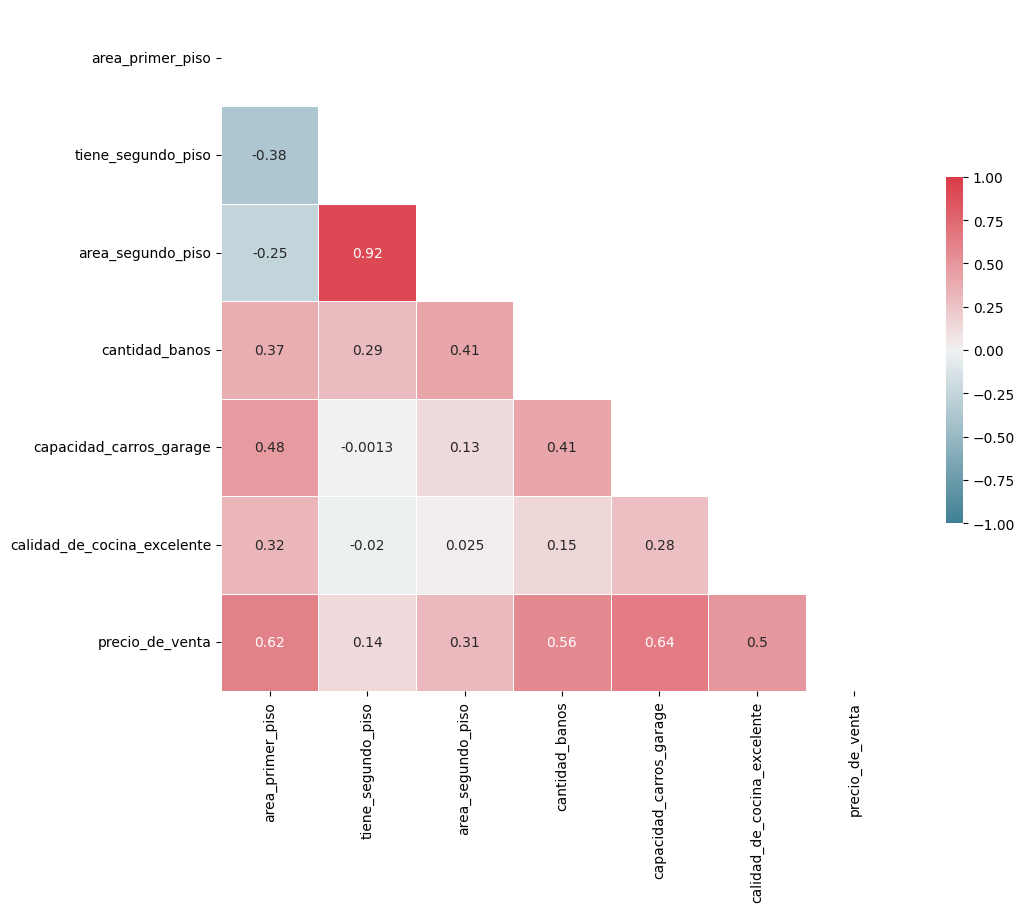

In [7]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Consejo: Presta atención a los puntos a continuación para un análisis completo:

* Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

* Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

Ejemplo:

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

## Relacionando variables

In [8]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

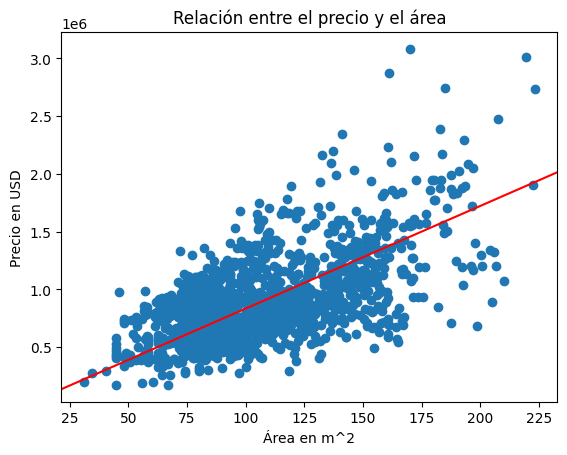

In [9]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')
plt.title('Relación entre el precio y el área')
plt.xlabel('Área en m^2')
plt.ylabel('Precio en USD')
plt.show()

In [10]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# Si quisieramos trazar una línea que nos permita describir este comportamiento... ¿cómo lo hacemos?

## Mejor recta

In [11]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso',y='precio_de_venta',trendline_color_override='red')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

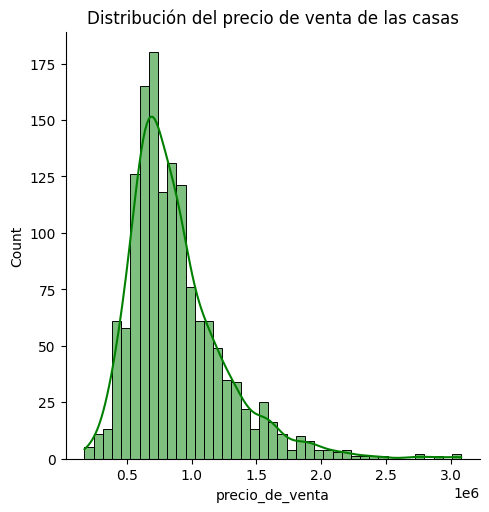

In [12]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución del precio de venta de las casas')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

y=datos['precio_de_venta']
X=datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=230)
#random state para garantizar la reproductibilidad de la segregacion de los datos

In [14]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta']=y_train

In [15]:
# import ols
from statsmodels.formula.api import ols

In [16]:
# ajustando el primer modelo
modelo_0=ols('precio_de_venta ~ area_primer_piso',data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [17]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [18]:
# El resumen del modelo
modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        17:34:21   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04      4.981      0.000    9.27e+04    2.13e+05
area_primer_piso  6793.6416    275.455     24.663      0.000    6253.109    7334.175
==============================================================================
Omnibus:                      190.778   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.457
Skew:                           0.998   Prob(JB):                    1.72e-105
Kurtosis:                       5.743   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [19]:
# observando el R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el residuo

In [20]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


Text(0.5, 1.0, 'Distribución de los residuos')

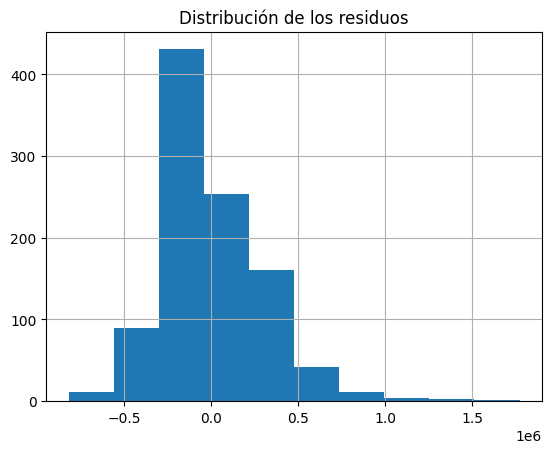

In [21]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [22]:
# definiendo la 'Y' prevista
y_predict=modelo_0.predict(X_test)

In [23]:
# importando el r2_score
from sklearn.metrics import r2_score

In [24]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación R^2 para el modelo_0 con los datos de prueba es de: {r2_score(y_test,y_predict):.2}')

El coeficiente de determinación R^2 para el modelo_0 con los datos de prueba es de: 0.39


###Haz lo mismo

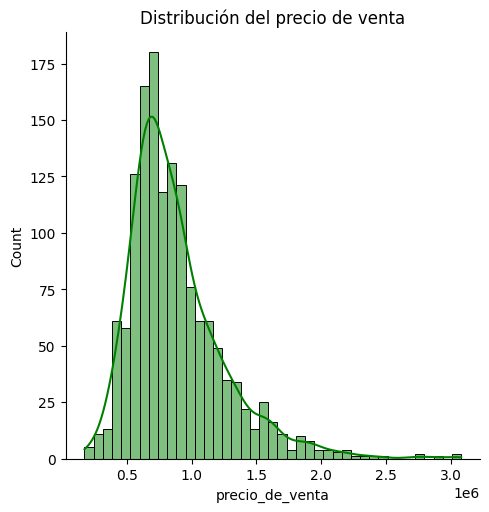

In [25]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

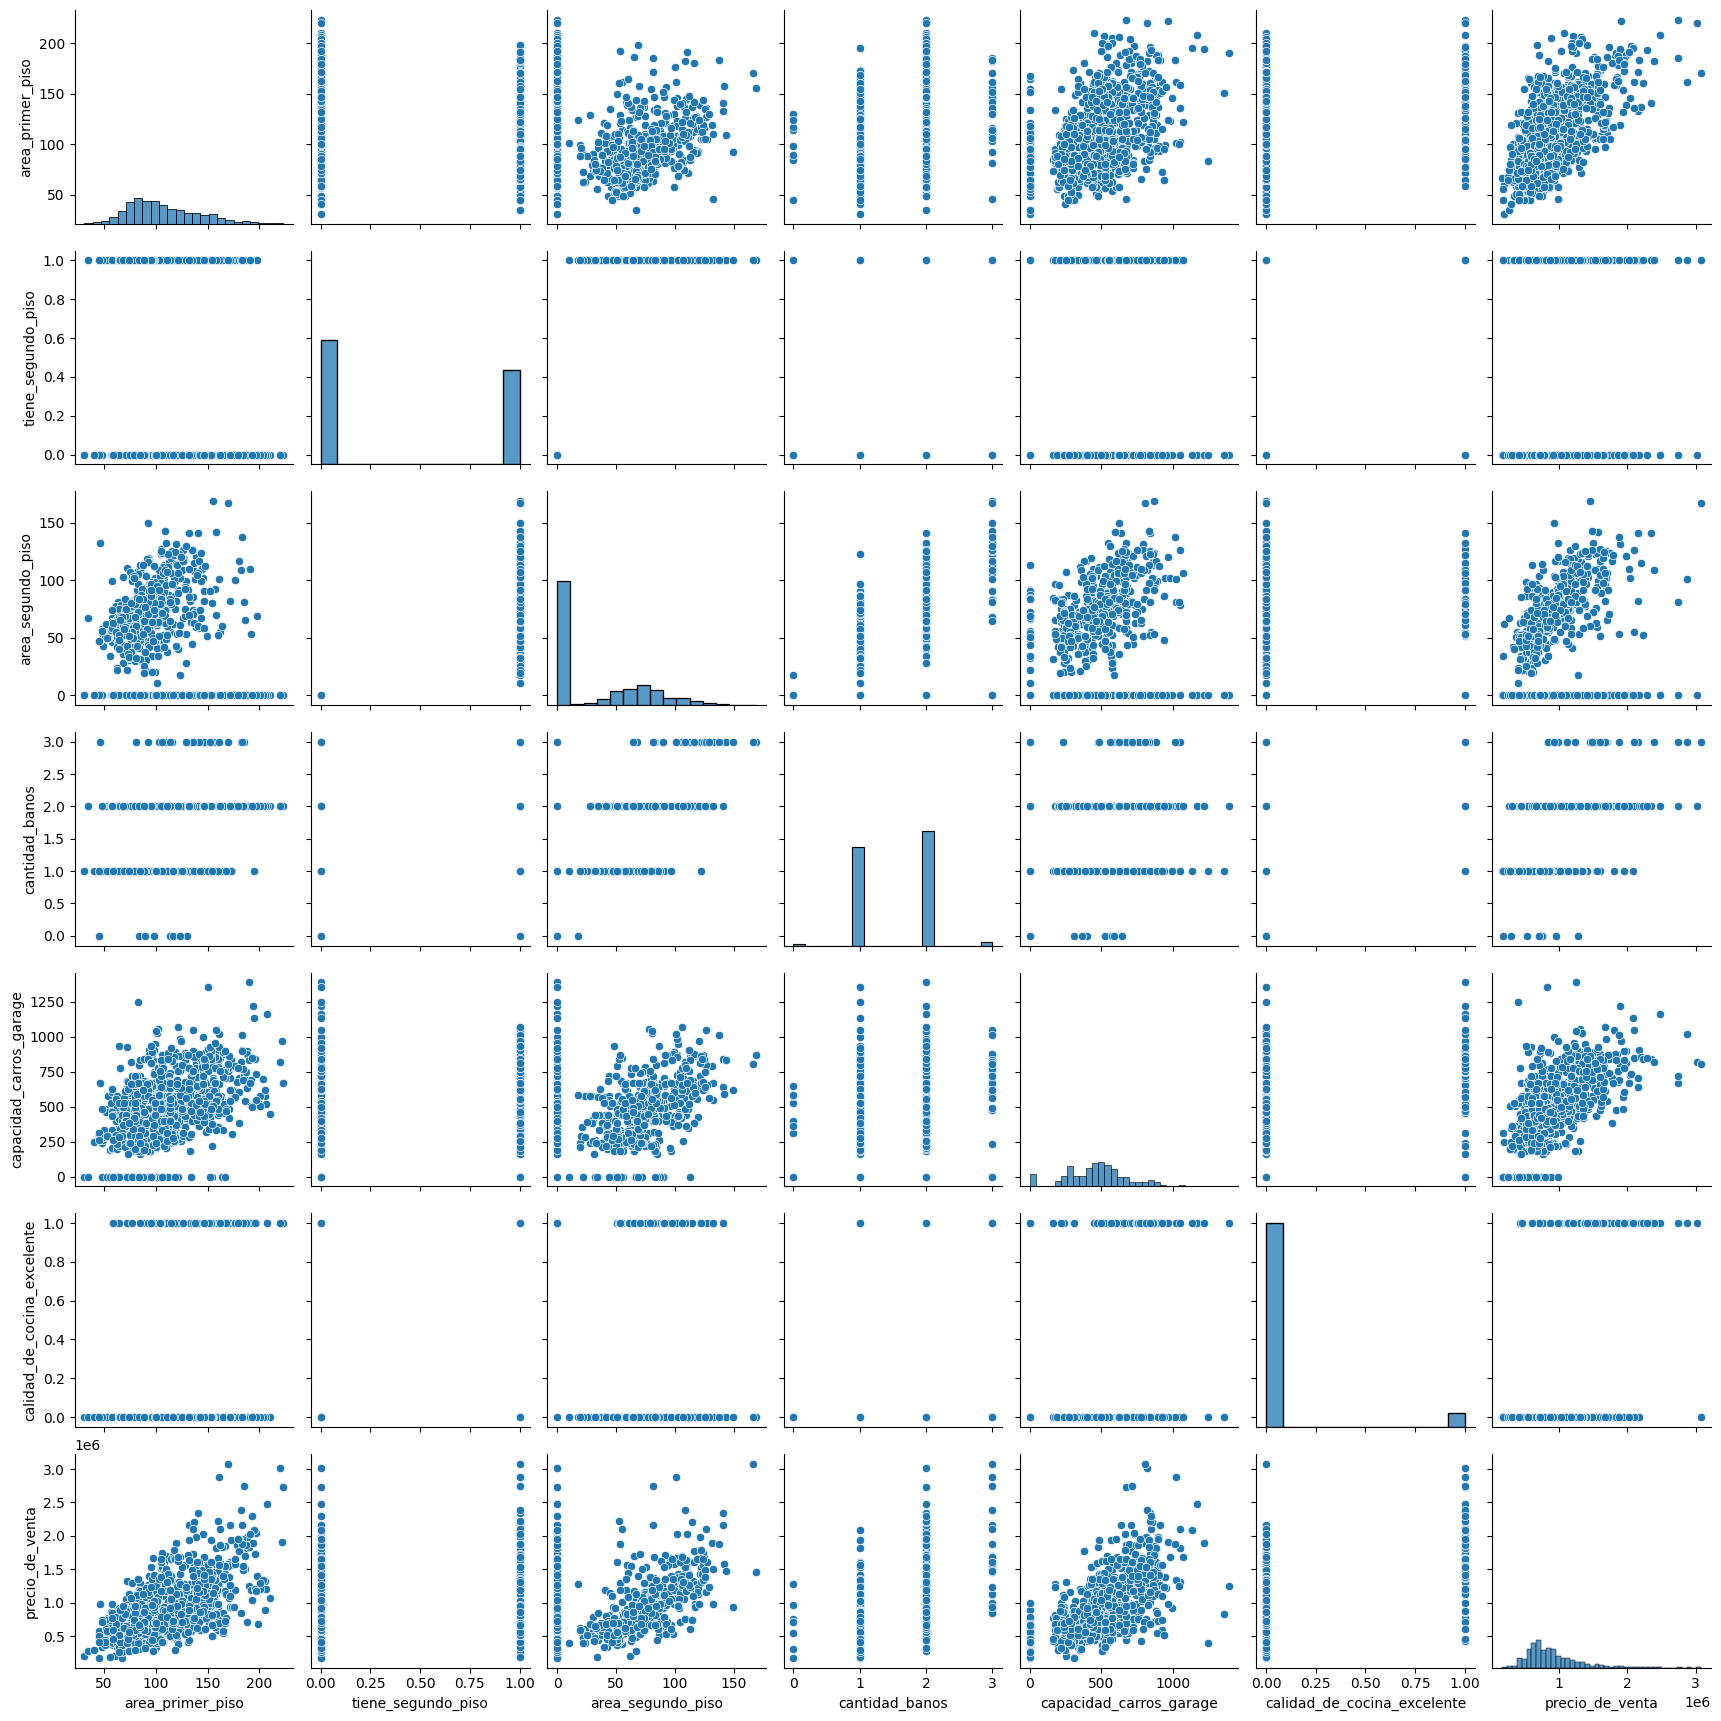

In [26]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

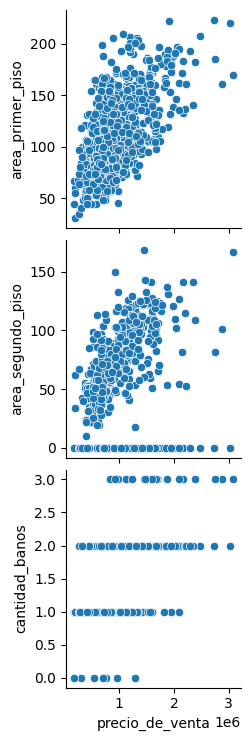

In [27]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos,y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'],x_vars=['precio_de_venta'])

## Añadiendo factores al modelo

In [28]:
# importando la api de statsmodels
import statsmodels.api as sm

In [29]:
# Añadiendo una constante
X_train =sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [30]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1=sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage', 'calidad_de_cocina_excelente']]).fit()

In [31]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [32]:
# Modelo sin el área del segundo piso
modelo_2=sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [33]:
# Modelo sin la información del garage
modelo_3=sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [34]:
# Resumen del modelos
modelos=[modelo_0,modelo_1,modelo_2,modelo_3]

for i,j in enumerate(modelos):
  print(f'********************************************************************************\n******************** El modelo {i} tiene el siguiente resumen ********************\n********************************************************************************')
  print(j.summary(),'\n\n')

********************************************************************************
******************** El modelo 0 tiene el siguiente resumen ********************
********************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        17:34:32   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust         

In [35]:
for i,j in enumerate(modelos):
  print(f'El coeficiente de determinación R^2 del modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación R^2 del modelo 0: 0.38
El coeficiente de determinación R^2 del modelo 1: 0.74
El coeficiente de determinación R^2 del modelo 2: 0.71
El coeficiente de determinación R^2 del modelo 3: 0.65


## Comparando los modelos
¿Cuál es el modelo?


In [36]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


###Manos a la obra
Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

1. Análisis inicial con el PairPlot de Seaborn;
2. Construir modelos de regresión lineal; y
3. Realizar la comparación de estos modelos.

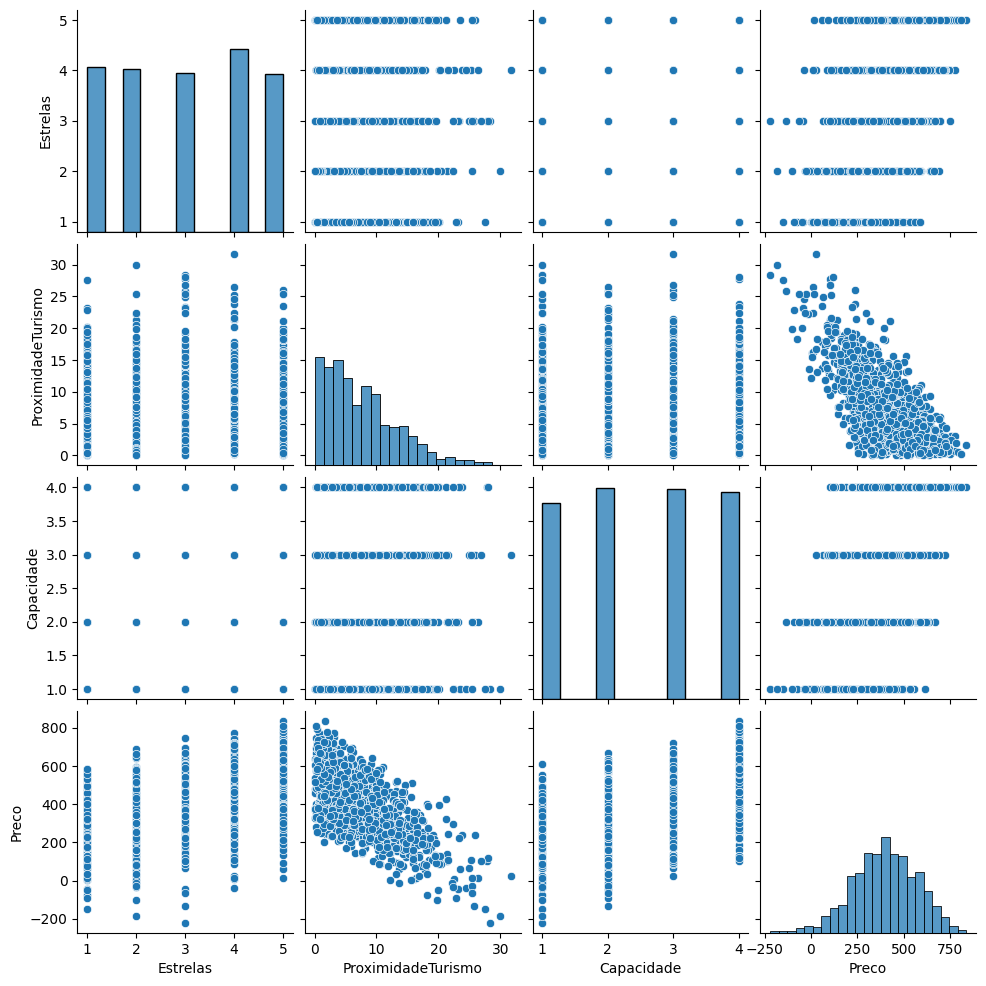

In [37]:
#0 importar datos
import pandas as pd
data=pd.read_csv('/content/m_hoteles.csv')

#1 Análisis inicial con Pairplot
sns.pairplot(data)

In [38]:
data.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

In [39]:
#2. Construir modelos de regresión lineal
# importando la api de statsmodels
import statsmodels.api as sm

In [40]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = data[['ProximidadeTurismo']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = data['Preco']
m1 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = data[['ProximidadeTurismo','Estrelas']]
X2 = sm.add_constant(X2)
m2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = data[['ProximidadeTurismo', 'Estrelas', 'Capacidade']]
X3 = sm.add_constant(X3)
m3 = sm.OLS(y, X3).fit()

# Modelo 4: Utilizando 'Estrelas'
X4 = data[['Estrelas']]
X4 = sm.add_constant(X4)
m4 = sm.OLS(y, X4).fit()

In [41]:
#3 Comparación de los modelos
mdls=[m1,m2,m3,m4]

for i,j in enumerate(mdls):
  print(f'********************************************************************************\n******************** El modelo {i+1} tiene el siguiente resumen ********************\n********************************************************************************')
  print(j.summary(),'\n\n')

********************************************************************************
******************** El modelo 1 tiene el siguiente resumen ********************
********************************************************************************
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     943.7
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.12e-146
Time:                        17:34:35   Log-Likelihood:                -6231.7
No. Observations:                1000   AIC:                         1.247e+04
Df Residuals:                     998   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust         

In [42]:
for i,j in enumerate(mdls):
  print(f'El coeficiente de determinación R^2 del modelo {i+1}: {j.rsquared.round(2)}')

El coeficiente de determinación R^2 del modelo 1: 0.49
El coeficiente de determinación R^2 del modelo 2: 0.65
El coeficiente de determinación R^2 del modelo 3: 0.92
El coeficiente de determinación R^2 del modelo 4: 0.16


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [43]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [44]:
# Previsión con el modelo 3
prevision_3=modelo_3.predict(X_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']])

In [45]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R^2 de la base de previsión es: {modelo_3.rsquared.round(2)}')

El coeficiente R^2 de la base de previsión es: 0.65


In [46]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R^2 con respecto a la base de entrenamiento es: {round(r2_score(y_test, prevision_3),2)}')

El coeficiente R^2 con respecto a la base de entrenamiento es: 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [47]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [48]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const':[1],
    'area_primer_piso':[120],
    'tiene_segundo_piso':[1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0]
})

In [49]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble).round(2)

,0
0,968146.29


In [50]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [51]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [52]:
# Leyendo varias casas
nuevas_casas=pd.read_csv('/content/nuevas_casas.csv', sep=';')

In [53]:
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


In [54]:
nuevas_casas.drop(columns='Casa', inplace=True)

In [55]:
# Añadiendo una constante
nuevas_casas=sm.add_constant(nuevas_casas)

In [56]:
# Cuál es el precio de estas nuevas casas
#precio_casas = pd.DataFrame()
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


###Ejercicio
Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

* 1 baño

* Área 98m²

* No tiene segundo piso

* Calidad de la cocina excelente

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.

In [57]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [58]:
inmueble_repaso=pd.DataFrame({
    'const':[1],
    'area_primer_piso':[98],
    'cantidad_banos':[1],
    'tiene_segundo_piso':[0],
    'calidad_de_cocina_excelente':[1],
})
modelo_3.predict(inmueble_repaso).round(2)

,0
0,1135444.52


# 5. Investigando el modelo





#Cómo guardar el Modelo con Pickle

Al desarrollar modelos de regresión con Statsmodels, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca pickle, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.

Vamos a explorar cómo guardar un modelo de regresión lineal de Statsmodels con la biblioteca pickle y luego cómo leer el archivo.

Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca pickle. Para ello, es necesario importar la biblioteca y luego podemos usar la función pickle.dump(), indicando el modelo y el archivo como parámetros.

In [59]:
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo_3, archivo)

**Cargar el Modelo de vuelta con Pickle**

Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método pickle.load() utilizando el archivo como parámetro de la función.

In [60]:
# Cargar el modelo de vuelta del archivo
with open(nombre_archivo, 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

Para más detalles sobre el uso de la biblioteca pickle, consulte la [documentación](https://docs.python.org/3/library/pickle.html).

## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [ ]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [65]:
explicativas_1=['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                'cantidad_banos', 'capacidad_carros_garage','calidad_de_cocina_excelente']
explicativas_2=['const', 'area_primer_piso', 'tiene_segundo_piso',
                'cantidad_banos', 'capacidad_carros_garage','calidad_de_cocina_excelente']
explicativas_3=['const', 'area_primer_piso', 'tiene_segundo_piso',
                'cantidad_banos','calidad_de_cocina_excelente']

In [66]:
# VIF 1
vif_1=pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['vif']=[vif(X_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [ ]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [67]:
# Previsión de los valores
y_previsto_train=modelo_3.predict(X_train[explicativas_3])

In [68]:
#Generando un scatter plot entre y_previsto y y_train
fig=px.scatter(x=y_previsto_train, y=y_train, title='Valor Previsto vs Real',
               labels={'x':'Valor Previsto', 'y':'Valor Real'})
fig.show()

In [69]:
# Comportamiento residuos
residuos=modelo_3.resid

fig=px.scatter(x=y_previsto_train, y=residuos, title='Valor Previsto vs Residuos',
               labels={'x':'Valor Previsto', 'y':'Valor Residuos'})
fig.show()

Inferencia:
El modelo no funciona para casas valuadas en más de un millón de dólares.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

### Ejercicio
**Primera etapa:** Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

In [71]:
#Leyendo los datos
import pandas as pd

energidata = pd.read_csv('/content/energia.csv')
energidata.sample(3)

,AT,V,AP,RH,PE
2908,27.99,69.89,1013.94,51.25,435.79
7583,15.29,38.73,1000.90,81.17,468.62
5299,32.33,67.83,1008.11,57.48,427.84


In [72]:
energidata.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [75]:
#modelo de regresión lineal asumiendo que la columna PE es la variable y
explicativas_energidata=['AT', 'V', 'AP', 'RH']

In [76]:
# import train_test_split
from sklearn.model_selection import train_test_split

ye=energidata['PE']
Xe=energidata.drop(columns='PE')

Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe,ye,test_size=0.3,random_state=101)

#Datos de entrenamiento para usar la fórmula
dfe_train = pd.DataFrame(Xe_train)
dfe_train['PE']=ye_train

# import ols
from statsmodels.formula.api import ols

# ajustando el primer modelo
modelo_e0=ols('PE ~ AT',data=dfe_train).fit()

In [78]:
# visualizando los parámetros
modelo_e0.params

,0
Intercept,497.185624
AT,-2.177111


In [79]:
# El resumen del modelo
modelo_e0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 6.032e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:14:01   Log-Likelihood:                -20824.
No. Observations:                6697   AIC:                         4.165e+04
Df Residuals:                    6695   BIC:                         4.167e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.1856      0.185   2684.935      0.000     496.823     497.549
AT            -2.1771      0.009   -245.601      0.000      -2.194      -2.160
==============================================================================
Omnibus:                      219.506   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.555
Skew:                          -0.164   Prob(JB):                    1.12e-112
Kurtosis:                       4.319   Cond. No.                         58.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Distribución de los residuos')

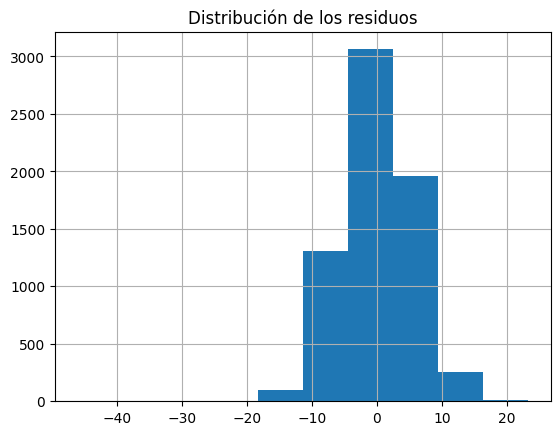

In [80]:
# Cómo están distribuidos
modelo_e0.resid.hist()
plt.title('Distribución de los residuos')

In [81]:
# definiendo la 'Y' prevista
ye_predict=modelo_e0.predict(Xe_test)
# importando el r2_score
from sklearn.metrics import r2_score
# mostrando el resultado de r²
print(f'El coeficiente de determinación R^2 para el modelo_0 con los datos de prueba es de: {r2_score(ye_test,ye_predict):.2}')

El coeficiente de determinación R^2 para el modelo_0 con los datos de prueba es de: 0.9


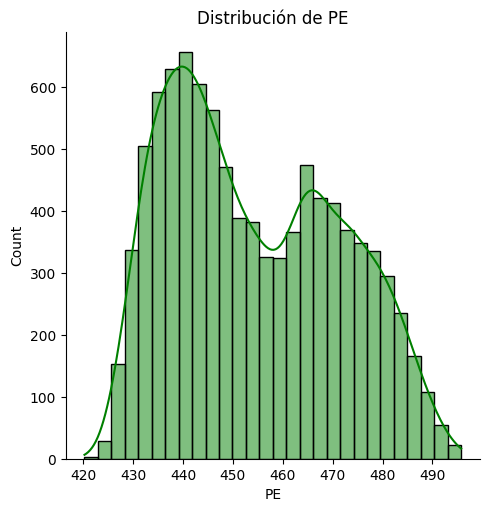

In [82]:
sns.displot(energidata['PE'], kde=True, color='green')
plt.title('Distribución de PE')
plt.show()

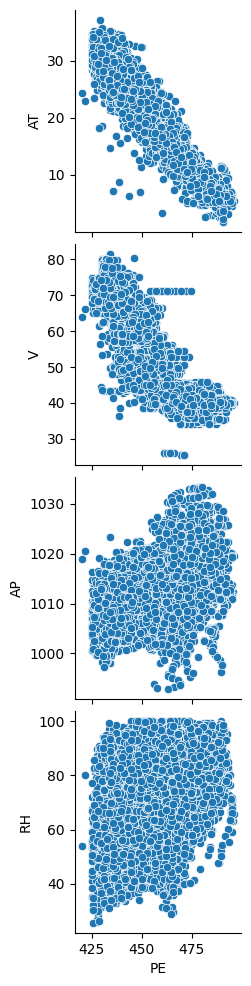

In [84]:
sns.pairplot(energidata,y_vars=['AT', 'V', 'AP', 'RH'],x_vars=['PE'])

In [85]:
# importando la api de statsmodels
import statsmodels.api as sm

# Añadiendo una constante
Xe_train =sm.add_constant(Xe_train)
Xe_train.head()

,const,AT,V,AP,RH
1531,1.0,20.68,42.04,1010.20,63.43
8441,1.0,20.18,56.53,1020.30,77.10
583,1.0,24.27,68.28,1005.43,67.63
7566,1.0,22.21,48.14,1015.08,66.80
9512,1.0,18.33,52.08,1001.78,100.09


In [88]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_e1=sm.OLS(ye_train,Xe_train[['const','AT', 'V', 'AP', 'RH']]).fit()

In [89]:
# Creando el modelo de regresión 2 (quitando una de las variables)
modelo_e2=sm.OLS(ye_train,Xe_train[['const','AT', 'V', 'AP']]).fit()

In [90]:
# Resumen del modelos
modelos_e=[modelo_e0,modelo_e1,modelo_e2]

for i,j in enumerate(modelos_e):
  print(f'********************************************************************************\n******************** El modelo {i} tiene el siguiente resumen ********************\n********************************************************************************')
  print(j.summary(),'\n\n')

********************************************************************************
******************** El modelo 0 tiene el siguiente resumen ********************
********************************************************************************
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 6.032e+04
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:23:26   Log-Likelihood:                -20824.
No. Observations:                6697   AIC:                         4.165e+04
Df Residuals:                    6695   BIC:                         4.167e+04
Df Model:                           1                                         
Covariance Type:            nonrobust         

In [91]:
for i,j in enumerate(modelos_e):
  print(f'El coeficiente de determinación R^2 del modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación R^2 del modelo 0: 0.9
El coeficiente de determinación R^2 del modelo 1: 0.93
El coeficiente de determinación R^2 del modelo 2: 0.92


In [92]:
# Añadiendo una constante en X_test
Xe_test = sm.add_constant(Xe_test)
Xe_test.head(2)

,const,AT,V,AP,RH
8052,1.0,11.91,44.45,1021.39,84.49
3198,1.0,14.91,46.90,1019.59,98.10


In [93]:
# Previsión con el modelo 3
prevision_e2=modelo_e2.predict(Xe_test[['const','AT', 'V', 'AP']])

print(f'El coeficiente R^2 de la base de previsión es: {modelo_e2.rsquared.round(2)}')

El coeficiente R^2 de la base de previsión es: 0.92


In [94]:
print(f'El coeficiente R^2 con respecto a la base de entrenamiento es: {round(r2_score(ye_test, prevision_e2),2)}')

El coeficiente R^2 con respecto a la base de entrenamiento es: 0.92


In [95]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_e2=pd.DataFrame()
vif_e2['variables'] = explicativas_energidata
vif_e2['vif']=[vif(Xe_train[explicativas_energidata],i) for i in range(len(explicativas_energidata))]
vif_e2

,variables,vif
0,AT,38.644772
1,V,74.914404
2,AP,65.742735
3,RH,40.485622


In [96]:
ye_previsto_train=modelo_e2.predict(Xe_train[explicativas_energidata])

#Generando un scatter plot entre y_previsto y y_train
fig=px.scatter(x=ye_previsto_train, y=ye_train, title='Valor Previsto vs Real',
               labels={'x':'Valor Previsto', 'y':'Valor Real'})
fig.show()

In [97]:
# Comportamiento residuos
residuos_e=modelo_e2.resid

fig=px.scatter(x=ye_previsto_train, y=residuos_e, title='Valor Previsto vs Residuos',
               labels={'x':'Valor Previsto', 'y':'Valor Residuos'})
fig.show()

Inferencia:
Debido a que se observa una forma curva, se determina que hay desafortunadamente heterocedasticidad. Esto se fundamenta con los valores tan altos del vif (valor de inflación de la varianza).

Tras revisar la solución proporcionada por el instructor, veo que se considera que solo se recomienda eliminar la variable AT  del modelo, puesto que mencionan que tiene un VIF de 6.03 que supera el 5. Pero me queda duda de dónde están leyendo este valor, si estoy viendo que los valores del vif son estos:

In [99]:
#  variavel        vif
#0       AT  39.241893
#1        V  75.254708
#2       AP  66.054203
#3       RH  40.759650

#todos mayores a 5, justo como a mí me salió.